# Исследование объявлений о продаже квартир

Цель - провести анализ объектов недвижимости Санкт-Петурбурга и выявить взаимосвязь между ценой и прочими параметрами исследуемых квартир.


Описание входных данных:
+ airports_nearest — расстояние до ближайшего аэропорта в метрах (м)
+ balcony — число балконов
+ ceiling_height — высота потолков (м)
+ cityCenters_nearest — расстояние до центра города (м)
+ days_exposition — сколько дней было размещено объявление (от публикации до снятия)
+ first_day_exposition — дата публикации
+ floor — этаж
+ floors_total — всего этажей в доме
+ is_apartment — апартаменты (булев тип)
+ kitchen_area — площадь кухни в квадратных метрах (м²)
+ last_price — цена на момент снятия с публикации
+ living_area — жилая площадь в квадратных метрах(м²)
+ locality_name — название населённого пункта
+ open_plan — свободная планировка (булев тип)
+ parks_around3000 — число парков в радиусе 3 км
+ parks_nearest — расстояние до ближайшего парка (м)
+ ponds_around3000 — число водоёмов в радиусе 3 км
+ ponds_nearest — расстояние до ближайшего водоёма (м)
+ rooms — число комнат
+ studio — квартира-студия (булев тип)
+ total_area — площадь квартиры в квадратных метрах (м²)
+ total_images — число фотографий квартиры в объявлении

## Шаг 1. Откройте файл с данными и изучите общую информацию.

In [1]:
import pandas as pd
import numpy as np
import datetime
import matplotlib.pyplot as plt
import matplotlib.patches as mpatches
import warnings
warnings.filterwarnings("ignore")


In [2]:
display(realty_data.head(10))
realty_data.info()
realty_data.describe()



,total_images,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,is_apartment,...,kitchen_area,balcony,locality_name,airports_nearest,cityCenters_nearest,parks_around3000,parks_nearest,ponds_around3000,ponds_nearest,days_exposition
0,20,13000000.0,108.00,2019-03-07T00:00:00,3,2.70,16.0,51.00,8,NaN,...,25.00,NaN,Санкт-Петербург,18863.0,16028.0,1.0,482.0,2.0,755.0,NaN
1,7,3350000.0,40.40,2018-12-04T00:00:00,1,NaN,11.0,18.60,1,NaN,...,11.00,2.0,посёлок Шушары,12817.0,18603.0,0.0,NaN,0.0,NaN,81.0
2,10,5196000.0,56.00,2015-08-20T00:00:00,2,NaN,5.0,34.30,4,NaN,...,8.30,0.0,Санкт-Петербург,21741.0,13933.0,1.0,90.0,2.0,574.0,558.0
3,0,64900000.0,159.00,2015-07-24T00:00:00,3,NaN,14.0,NaN,9,NaN,...,NaN,0.0,Санкт-Петербург,28098.0,6800.0,2.0,84.0,3.0,234.0,424.0
4,2,10000000.0,100.00,2018-06-19T00:00:00,2,3.03,14.0,32.00,13,NaN,...,41.00,NaN,Санкт-Петербург,31856.0,8098.0,2.0,112.0,1.0,48.0,121.0
5,10,2890000.0,30.40,2018-09-10T00:00:00,1,NaN,12.0,14.40,5,NaN,...,9.10,NaN,городской посёлок Янино-1,NaN,NaN,NaN,NaN,NaN,NaN,55.0
6,6,3700000.0,37.30,2017-11-02T00:00:00,1,NaN,26.0,10.60,6,NaN,...,14.40,1.0,посёлок Парголово,52996.0,19143.0,0.0,NaN,0.0,NaN,155.0
7,5,7915000.0,71.60,2019-04-18T00:00:00,2,NaN,24.0,NaN,22,NaN,...,18.90,2.0,Санкт-Петербург,23982.0,11634.0,0.0,NaN,0.0,NaN,NaN
8,20,2900000.0,33.16,2018-05-23T00:00:00,1,NaN,27.0,15.43,26,NaN,...,8.81,NaN,посёлок Мурино,NaN,NaN,NaN,NaN,NaN,NaN,189.0
9,18,5400000.0,61.00,2017-02-26T00:00:00,3,2.50,9.0,43.60,7,NaN,...,6.50,2.0,Санкт-Петербург,50898.0,15008.0,0.0,NaN,0.0,NaN,289.0


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 23699 entries, 0 to 23698
Data columns (total 22 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   total_images          23699 non-null  int64  
 1   last_price            23699 non-null  float64
 2   total_area            23699 non-null  float64
 3   first_day_exposition  23699 non-null  object 
 4   rooms                 23699 non-null  int64  
 5   ceiling_height        14504 non-null  float64
 6   floors_total          23613 non-null  float64
 7   living_area           21796 non-null  float64
 8   floor                 23699 non-null  int64  
 9   is_apartment          2775 non-null   object 
 10  studio                23699 non-null  bool   
 11  open_plan             23699 non-null  bool   
 12  kitchen_area          21421 non-null  float64
 13  balcony               12180 non-null  float64
 14  locality_name         23650 non-null  object 
 15  airports_nearest   

,total_images,last_price,total_area,rooms,ceiling_height,floors_total,living_area,floor,kitchen_area,balcony,airports_nearest,cityCenters_nearest,parks_around3000,parks_nearest,ponds_around3000,ponds_nearest,days_exposition
count,23699.000000,2.369900e+04,23699.000000,23699.000000,14504.000000,23613.000000,21796.000000,23699.000000,21421.000000,12180.000000,18157.000000,18180.000000,18181.000000,8079.000000,18181.000000,9110.000000,20518.000000
mean,9.858475,6.541549e+06,60.348651,2.070636,2.771499,10.673824,34.457852,5.892358,10.569807,1.150082,28793.672193,14191.277833,0.611408,490.804555,0.770255,517.980900,180.888634
std,5.682529,1.088701e+07,35.654083,1.078405,1.261056,6.597173,22.030445,4.885249,5.905438,1.071300,12630.880622,8608.386210,0.802074,342.317995,0.938346,277.720643,219.727988
min,0.000000,1.219000e+04,12.000000,0.000000,1.000000,1.000000,2.000000,1.000000,1.300000,0.000000,0.000000,181.000000,0.000000,1.000000,0.000000,13.000000,1.000000
25%,6.000000,3.400000e+06,40.000000,1.000000,2.520000,5.000000,18.600000,2.000000,7.000000,0.000000,18585.000000,9238.000000,0.000000,288.000000,0.000000,294.000000,45.000000
50%,9.000000,4.650000e+06,52.000000,2.000000,2.650000,9.000000,30.000000,4.000000,9.100000,1.000000,26726.000000,13098.500000,0.000000,455.000000,1.000000,502.000000,95.000000
75%,14.000000,6.800000e+06,69.900000,3.000000,2.800000,16.000000,42.300000,8.000000,12.000000,2.000000,37273.000000,16293.000000,1.000000,612.000000,1.000000,729.000000,232.000000
max,50.000000,7.630000e+08,900.000000,19.000000,100.000000,60.000000,409.700000,33.000000,112.000000,5.000000,84869.000000,65968.000000,3.000000,3190.000000,3.000000,1344.000000,1580.000000


## Вывод

Предварительный анализ данных показывает, что перед проведением исследования данных необходимо провести значительную предобработку:  
Обработать пустые значения в столбцах:
+ 'airport_nearest'
+ 'balcony'
+ 'citiCenters_nearest'
+ 'ceiling_height'
+ 'floor total'
+ 'is_apartment'
+ 'kitchen_area'
+ 'living_area'
+ 'locality_name'
+ 'parks_around3000'
+ 'park_nearest'
+ 'ponds_around3000'
+ 'ponds_nearest' 

Обработать нулевые значения в столбце 'rooms'  

Привести в соответствие тип данных в следующих столбцах:
+ 'floor total'
+ 'is_apartment'
+ 'balcony'
+ 'parks_around3000'
+ 'ponds_around3000'
+ 'day_exposition' 
            

## Шаг 2. Предобработка данных

In [3]:
# Проверим наличие дубликатов
realty_data.duplicated().sum()

0

### Столбец 'balcony'

In [4]:
# Заменяем пустые значения балконов на 0
realty_data['balcony'] = realty_data['balcony'].fillna(0) 


### Столбец 'ceiling_height'

Пустые значения высоты потолков заполним медианными значениями для квартир, находящихся в аналогичных городах и домах той же этажности, что и квартиры с незаполненными данными.

In [5]:
floors_pivot = realty_data.pivot_table(index = ['locality_name', 'floors_total'], values = 'ceiling_height', aggfunc = 'median')
#Преобразуем в датафрэйм
floors_pivot = floors_pivot.reset_index()
display(floors_pivot)

,locality_name,floors_total,ceiling_height
0,Бокситогорск,3.0,5.000
1,Бокситогорск,4.0,2.800
2,Волосово,4.0,2.500
3,Волосово,5.0,2.525
4,Волхов,2.0,3.000
...,...,...,...
865,село Павлово,5.0,2.575
866,село Путилово,3.0,2.600
867,село Путилово,5.0,2.500
868,село Русско-Высоцкое,5.0,2.600


In [6]:
#Данные до замены
display(realty_data.head())

,total_images,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,is_apartment,...,kitchen_area,balcony,locality_name,airports_nearest,cityCenters_nearest,parks_around3000,parks_nearest,ponds_around3000,ponds_nearest,days_exposition
0,20,13000000.0,108.0,2019-03-07T00:00:00,3,2.70,16.0,51.0,8,NaN,...,25.0,0.0,Санкт-Петербург,18863.0,16028.0,1.0,482.0,2.0,755.0,NaN
1,7,3350000.0,40.4,2018-12-04T00:00:00,1,NaN,11.0,18.6,1,NaN,...,11.0,2.0,посёлок Шушары,12817.0,18603.0,0.0,NaN,0.0,NaN,81.0
2,10,5196000.0,56.0,2015-08-20T00:00:00,2,NaN,5.0,34.3,4,NaN,...,8.3,0.0,Санкт-Петербург,21741.0,13933.0,1.0,90.0,2.0,574.0,558.0
3,0,64900000.0,159.0,2015-07-24T00:00:00,3,NaN,14.0,NaN,9,NaN,...,NaN,0.0,Санкт-Петербург,28098.0,6800.0,2.0,84.0,3.0,234.0,424.0
4,2,10000000.0,100.0,2018-06-19T00:00:00,2,3.03,14.0,32.0,13,NaN,...,41.0,0.0,Санкт-Петербург,31856.0,8098.0,2.0,112.0,1.0,48.0,121.0


In [7]:
def fill_ceiling_height(row, pivot = floors_pivot):
    if row['ceiling_height'] != row['ceiling_height']: 
        name = row['locality_name']
        floors = row['floors_total']
        result = pivot.query('locality_name == @name and floors_total == @floors')['ceiling_height']
        if result.size > 0:
            result = result.tolist()
            return result[0]
    return row['ceiling_height']

In [8]:
realty_data['ceiling_height'] = realty_data.apply(fill_ceiling_height, axis = 1)

In [9]:
# Контрольная проверка данных после замены
display(realty_data.head())

,total_images,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,is_apartment,...,kitchen_area,balcony,locality_name,airports_nearest,cityCenters_nearest,parks_around3000,parks_nearest,ponds_around3000,ponds_nearest,days_exposition
0,20,13000000.0,108.0,2019-03-07T00:00:00,3,2.70,16.0,51.0,8,NaN,...,25.0,0.0,Санкт-Петербург,18863.0,16028.0,1.0,482.0,2.0,755.0,NaN
1,7,3350000.0,40.4,2018-12-04T00:00:00,1,NaN,11.0,18.6,1,NaN,...,11.0,2.0,посёлок Шушары,12817.0,18603.0,0.0,NaN,0.0,NaN,81.0
2,10,5196000.0,56.0,2015-08-20T00:00:00,2,2.60,5.0,34.3,4,NaN,...,8.3,0.0,Санкт-Петербург,21741.0,13933.0,1.0,90.0,2.0,574.0,558.0
3,0,64900000.0,159.0,2015-07-24T00:00:00,3,2.60,14.0,NaN,9,NaN,...,NaN,0.0,Санкт-Петербург,28098.0,6800.0,2.0,84.0,3.0,234.0,424.0
4,2,10000000.0,100.0,2018-06-19T00:00:00,2,3.03,14.0,32.0,13,NaN,...,41.0,0.0,Санкт-Петербург,31856.0,8098.0,2.0,112.0,1.0,48.0,121.0


In [10]:
realty_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 23699 entries, 0 to 23698
Data columns (total 22 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   total_images          23699 non-null  int64  
 1   last_price            23699 non-null  float64
 2   total_area            23699 non-null  float64
 3   first_day_exposition  23699 non-null  object 
 4   rooms                 23699 non-null  int64  
 5   ceiling_height        23196 non-null  float64
 6   floors_total          23613 non-null  float64
 7   living_area           21796 non-null  float64
 8   floor                 23699 non-null  int64  
 9   is_apartment          2775 non-null   object 
 10  studio                23699 non-null  bool   
 11  open_plan             23699 non-null  bool   
 12  kitchen_area          21421 non-null  float64
 13  balcony               23699 non-null  float64
 14  locality_name         23650 non-null  object 
 15  airports_nearest   

Имеем в остатке 503 незаполненных значения, по которым не нашлось соответствия паре "Город-этажность здания". Их заменим просто медианными значениями (2,6 м.), т.к. это кол-во составляет около 2 % от общей выборки, погрешность заполнения будем считать допустимой.

In [11]:
realty_data['ceiling_height'] = realty_data['ceiling_height'].fillna(realty_data['ceiling_height'].median()) 


In [12]:
# Проверяем
print(realty_data['ceiling_height'].value_counts())
realty_data.info()

2.50     4324
2.60     3538
2.70     2972
2.55     2087
2.75     2036
         ... 
1.75        1
4.15        1
14.85       1
4.30        1
3.39        1
Name: ceiling_height, Length: 205, dtype: int64
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 23699 entries, 0 to 23698
Data columns (total 22 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   total_images          23699 non-null  int64  
 1   last_price            23699 non-null  float64
 2   total_area            23699 non-null  float64
 3   first_day_exposition  23699 non-null  object 
 4   rooms                 23699 non-null  int64  
 5   ceiling_height        23699 non-null  float64
 6   floors_total          23613 non-null  float64
 7   living_area           21796 non-null  float64
 8   floor                 23699 non-null  int64  
 9   is_apartment          2775 non-null   object 
 10  studio                23699 non-null  bool   
 11  open_plan            

Видим, что кроме пустых значений есть и явно ошибочные значения, например, высота потолка 100 метров. Проверим, какие еще значения вызывают сомнения в своей адекватности.

In [13]:
print(realty_data['ceiling_height'].unique())

[  2.7     2.65    2.6     3.03    2.625   2.75    2.5     2.67    2.55
   2.56    3.05    3.      2.9     2.8     2.76    3.2     2.645   2.61
   2.54    3.15    3.25    3.45    2.77    2.85    2.64    2.57    4.15
   3.5     3.3     2.71    4.      2.47    2.73    2.84    3.1     2.675
   2.34    3.4     2.52    3.06    2.72    2.51    2.78   13.85    2.725
  25.      2.58    3.7    14.85    5.2     2.575   2.525   2.745   2.87
   2.66    2.775   2.59    2.      2.45    3.6     5.      2.92    2.505
   3.11    3.13    2.735   3.8     3.55    3.16    3.62    3.12    2.53
   2.565   2.74    2.96    2.46    5.3     2.79    2.95    4.06    2.94
   3.82    3.54    3.53    2.83    3.325   4.7     2.4     3.38    3.01
   5.6     2.65    3.65    3.9     3.18    3.35    2.3     3.57    2.48
   2.62    2.82    3.98    2.63    3.83    2.715   3.52    3.95    3.75
   2.88    3.67    3.87    3.66    3.85    3.86    4.19    3.24    4.8
   4.5     4.2     3.36   32.      3.08    3.68    3.07    3.3

In [14]:
#Заменим явно ошибочные значения высоты потолков менее 2.5 и более 10 метров, на наиболее распространенное значение 2.5 метра
realty_data.loc[(realty_data['ceiling_height'] > 10) | (realty_data['ceiling_height'] < 2.5), 'ceiling_height'] = 2.5


In [15]:
# Проверяем
print(realty_data['ceiling_height'].unique())

[2.7   2.65  2.6   3.03  2.625 2.75  2.5   2.67  2.55  2.56  3.05  3.
 2.9   2.8   2.76  3.2   2.645 2.61  2.54  3.15  3.25  3.45  2.77  2.85
 2.64  2.57  4.15  3.5   3.3   2.71  4.    2.73  2.84  3.1   2.675 3.4
 2.52  3.06  2.72  2.51  2.78  2.725 2.58  3.7   5.2   2.575 2.525 2.745
 2.87  2.66  2.775 2.59  3.6   5.    2.92  2.505 3.11  3.13  2.735 3.8
 3.55  3.16  3.62  3.12  2.53  2.565 2.74  2.96  5.3   2.79  2.95  4.06
 2.94  3.82  3.54  3.53  2.83  3.325 4.7   3.38  3.01  5.6   2.65  3.65
 3.9   3.18  3.35  3.57  2.62  2.82  3.98  2.63  3.83  2.715 3.52  3.95
 3.75  2.88  3.67  3.87  3.66  3.85  3.86  4.19  3.24  4.8   4.5   4.2
 3.36  3.08  3.68  3.07  3.37  3.09  8.    3.26  3.34  2.775 2.81  3.44
 2.97  3.14  4.37  2.68  2.6   3.22  3.27  4.1   2.93  3.46  2.785 3.47
 3.33  3.63  3.32  8.3   2.98  2.86  3.17  4.4   3.28  3.04  4.45  5.5
 3.84  3.23  3.02  3.21  3.43  3.78  4.3   3.39  2.69  3.31  4.65  3.56
 2.555 3.51  2.615 3.93  3.42  2.99  3.49  4.14  2.91  3.88  4.25  3.

### Столбец 'floors_total'

Заполним пустые значения максимального этажа здания значением этажа квартиры + 1.   
Далее в расчетах не используем общую этажность здания, используется только этажность конкретной квартиры. Общую этажность применим лишь для категоризации этажа квартир. Итогом категоризации будет градация "первый", "последний", "другой".  Т.о. учитывая, что вероятность произвольной квартиры оказаться принадлежащей "первому" или "последнему" этажу тем ниже, чем более многоэтажен дом, применимая методика позволит более вероятно вписать квартиру в свой диапазон этажей.  
Например, для стандартной девятиэтажки, вероятность верного определения "группы этажности" составит 1/9+1/9=2/9 или 77%.  Что нам собственно говоря и нужно.
Т.к. количество пустых значений максимального этажа здания составляет 86 шт., или 0,36% от общего объема и учитывая отсутствие прочего достоверного признака, позволяющего произвести такую замену, данный метод будем считать допустимым.

In [16]:
realty_data['floors_total'] = realty_data['floors_total'].fillna(realty_data['floor']+ 1)

### Столбец 'is_apartment'

In [17]:
#Т.к. в этом столбце отсутствует почти 90% данных и он не будет использоваться в дальнейшем анализе, удалим его.
del realty_data['is_apartment']


### Столбец 'rooms'

Проверим какое количество квартир с нулевым значением комнат и как это связано с прощадью

In [18]:
print(realty_data[realty_data['rooms'] == 0]['rooms'].count())

197


In [19]:
print(realty_data[realty_data['rooms'] == 0]['total_area'].unique())

[ 27.    25.    27.11  34.4   24.1   17.    26.1   35.    23.    29.
  32.    26.    31.    22.    30.    23.98  27.55  27.1   28.4   26.49
  28.9   24.    73.6   21.4   29.3   28.    25.4   20.    19.5   30.3
  27.81  26.8   32.3   42.63  29.2   27.3   21.3   19.    18.8   15.5
  38.3   16.    23.4   27.56  24.8   28.3   23.7   44.2   24.75  20.5
  29.1   26.7   25.27  27.32  23.06  23.5   32.4   21.    24.2   18.
  24.9   58.4   28.2   24.05  24.4   25.2   43.3   27.4   23.3   32.2
  32.03  25.7   42.1   22.3   28.01  32.8   26.23  25.3   28.05  31.1
  22.5   25.9   32.5   23.8  371.    24.6   30.5   25.41  98.4   23.6
  22.2   27.5   28.16  27.6   71.    28.5   24.5   22.7   34.    30.1
  27.7   26.05  23.39]


Т.к. подавляющее большинство этих квартир имеют площадь 20-30 кв.м, примем, что все эти квартиры являются однокомнатными

In [20]:
realty_data.loc[realty_data['rooms'] == 0, 'rooms'] = 1

In [21]:
#Проверяем
print(realty_data[realty_data['rooms'] == 0]['rooms'].count())

0


### Столбец 'kitchen_area'

Площадь кухни рассчитаем как медианное значение кухни для объектов с аналогичной площадью.  
Для этого поделим все квартиры на 10 эмпирически выделенных диапазонов по общей площади, рассчитаем медианную площадь кухни для каждого диапазона, и присвоим отсутствующим значениям найденное среднее значение своего диапазона.

In [22]:
#realty_data['total_area_bins'] = pd.cut(realty_data['total_area'], 10)
realty_data['total_area_bins'] = pd.cut(realty_data['total_area'], [0, 20, 30, 50, 70, 100, 200, 400, 600, 900])

In [23]:
#Создадим сводную таблицу по выделенным диапазонам
total_area_bins_kitchen = realty_data.pivot_table(index = 'total_area_bins', values = 'kitchen_area', aggfunc = 'median')

In [24]:
# Данный dataframe будем использовать в качестве "словаря" для заполнения пустых значений
display(total_area_bins_kitchen)


,kitchen_area
total_area_bins,
"(0, 20]",3.0
"(20, 30]",6.0
"(30, 50]",8.2
"(50, 70]",9.0
"(70, 100]",11.9
"(100, 200]",16.0
"(200, 400]",25.8
"(400, 600]",40.0
"(600, 900]",65.0


In [25]:
# Преобразуем его в словарь
total_area_bins_kitchen_dict = total_area_bins_kitchen.T.to_dict('list')
display(total_area_bins_kitchen_dict)


{Interval(0, 20, closed='right'): [3.0],
 Interval(20, 30, closed='right'): [6.0],
 Interval(30, 50, closed='right'): [8.2],
 Interval(50, 70, closed='right'): [9.0],
 Interval(70, 100, closed='right'): [11.9],
 Interval(100, 200, closed='right'): [16.0],
 Interval(200, 400, closed='right'): [25.799999999999997],
 Interval(400, 600, closed='right'): [40.0],
 Interval(600, 900, closed='right'): [65.0]}

In [26]:
# Для упрощения, заменим пустые значения на 0
realty_data['kitchen_area'] = realty_data['kitchen_area'].fillna(0)


In [27]:
# Ф-я замены пустых значений 'kitchen_area'
def get_kitchen_area(string, dict = total_area_bins_kitchen_dict):
    if string['kitchen_area'] == 0:
        for key, value in dict.items():
            if string['total_area'] in key:
                return value[0]
    return string['kitchen_area']        

In [28]:
#Данные до применения ф-ии
display(realty_data['kitchen_area'])

0        25.00
1        11.00
2         8.30
3         0.00
4        41.00
         ...  
23694    13.83
23695     8.50
23696     0.00
23697    23.30
23698     9.00
Name: kitchen_area, Length: 23699, dtype: float64

In [29]:
#Заменяем пустые значения, значениями из словаря
realty_data['kitchen_area'] = realty_data.apply(get_kitchen_area, axis=1)

In [30]:
# Проверяем. Данные после применения ф-ии
display(realty_data['kitchen_area'])

0        25.00
1        11.00
2         8.30
3        16.00
4        41.00
         ...  
23694    13.83
23695     8.50
23696     9.00
23697    23.30
23698     9.00
Name: kitchen_area, Length: 23699, dtype: float64

Видим, что ранее пустые значения в контрольных строках 3, 23696 успешно заменены медианой. 

### Столбец 'living_area'

Для начала проверим исходные данные на корректность. Удостоверимся, что имеющиеся данные в столбце 'living_area' не имеют ошибок. Для этого проверим, существуют ли квартиры, в которых площадь кухни и жилая площадь превышает общую площадь квартиры.

In [31]:
realty_data.query('(living_area + kitchen_area) > total_area')

,total_images,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,studio,...,balcony,locality_name,airports_nearest,cityCenters_nearest,parks_around3000,parks_nearest,ponds_around3000,ponds_nearest,days_exposition,total_area_bins
184,7,2600000.0,30.20,2018-02-14T00:00:00,1,2.65,9.0,26.10,5,False,...,0.0,Санкт-Петербург,13952.0,15031.0,0.0,NaN,1.0,824.0,12.0,"(30, 50]"
424,14,11500000.0,98.00,2016-05-10T00:00:00,3,2.65,3.0,88.00,3,False,...,1.0,Санкт-Петербург,39363.0,13270.0,0.0,NaN,0.0,NaN,90.0,"(70, 100]"
440,8,2480000.0,27.11,2018-03-12T00:00:00,1,2.70,17.0,24.75,4,True,...,2.0,Санкт-Петербург,38171.0,15015.0,0.0,NaN,2.0,982.0,64.0,"(20, 30]"
545,9,4700000.0,23.80,2018-12-28T00:00:00,1,2.70,18.0,20.00,9,False,...,0.0,Санкт-Петербург,9731.0,11849.0,0.0,NaN,0.0,NaN,108.0,"(20, 30]"
551,8,3100000.0,31.59,2018-03-08T00:00:00,1,2.70,19.0,30.55,2,False,...,2.0,посёлок Мурино,NaN,NaN,NaN,NaN,NaN,NaN,70.0,"(30, 50]"
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
22095,6,2194000.0,36.50,2017-09-27T00:00:00,1,3.00,3.0,33.20,3,False,...,0.0,Санкт-Петербург,39446.0,18500.0,0.0,NaN,2.0,639.0,36.0,"(30, 50]"
22246,6,3100000.0,27.30,2018-05-29T00:00:00,1,2.70,16.0,23.30,15,True,...,1.0,Санкт-Петербург,41935.0,9551.0,0.0,NaN,0.0,NaN,59.0,"(20, 30]"
22680,4,2100000.0,23.60,2016-02-25T00:00:00,1,2.75,25.0,17.70,23,False,...,0.0,деревня Кудрово,NaN,NaN,NaN,NaN,NaN,NaN,119.0,"(20, 30]"
23191,3,1900000.0,18.90,2016-04-04T00:00:00,1,2.65,16.0,16.00,12,False,...,0.0,Тосно,NaN,NaN,NaN,NaN,NaN,NaN,115.0,"(0, 20]"


Видим, что таких квартир 136 шт. Разберемся с ними позже, а сначала заполним пустые значения.

Пустые значения столбца жилой площади заполним аналогично площади кухни - разобьем выборку на диапазоны, посчитаем  медианное значение для каждой группы, присвоим эти данные отсутствующим значениям в соответствии с их принадлежностью к группе общей площади.

In [32]:
total_area_bins_living = realty_data.pivot_table(index = 'total_area_bins', values = 'living_area', aggfunc = 'median')

In [33]:
display(total_area_bins_living)

,living_area
total_area_bins,
"(0, 20]",13.500
"(20, 30]",16.410
"(30, 50]",18.795
"(50, 70]",34.600
"(70, 100]",48.000
"(100, 200]",72.200
"(200, 400]",154.350
"(400, 600]",276.800
"(600, 900]",322.300


In [34]:
total_area_bins_living_dict = total_area_bins_living.T.to_dict('list')
display(total_area_bins_living_dict)


{Interval(0, 20, closed='right'): [13.5],
 Interval(20, 30, closed='right'): [16.41],
 Interval(30, 50, closed='right'): [18.795],
 Interval(50, 70, closed='right'): [34.6],
 Interval(70, 100, closed='right'): [48.0],
 Interval(100, 200, closed='right'): [72.2],
 Interval(200, 400, closed='right'): [154.35],
 Interval(400, 600, closed='right'): [276.8],
 Interval(600, 900, closed='right'): [322.3]}

In [35]:
realty_data['living_area'] = realty_data['living_area'].fillna(0)

In [36]:
def get_living_area(string, dict = total_area_bins_living_dict):
    if string['living_area'] == 0:
        for key, value in dict.items():
            if string['total_area'] in key:
                return value[0]
    return string['living_area']        

In [37]:
display(realty_data['living_area'])

0        51.0
1        18.6
2        34.3
3         0.0
4        32.0
         ... 
23694    73.3
23695    38.0
23696    29.7
23697     0.0
23698    12.3
Name: living_area, Length: 23699, dtype: float64

In [38]:
realty_data['living_area'] = realty_data.apply(get_living_area, axis=1)

In [39]:
# Проверяем
display(realty_data['living_area'])

0        51.0
1        18.6
2        34.3
3        72.2
4        32.0
         ... 
23694    73.3
23695    38.0
23696    29.7
23697    48.0
23698    12.3
Name: living_area, Length: 23699, dtype: float64

Замена значений в контрольных строках прошла успешно.

In [40]:
#Удалим из датафрэйма временный столбец `total_area_bins`
del realty_data['total_area_bins']

Произведем проверку, что в результате заполнения пропусков жилой площади и площади кухни мы не нарушили общую  логику данных, т.е. что сумма площади кухни + жилой площади не может быть больше общей площади квартиры.  
Найдем строки, где эта логика нарушена и оценим их количество.

In [41]:
realty_data.query('(living_area + kitchen_area) > total_area')

,total_images,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,studio,...,kitchen_area,balcony,locality_name,airports_nearest,cityCenters_nearest,parks_around3000,parks_nearest,ponds_around3000,ponds_nearest,days_exposition
184,7,2600000.0,30.20,2018-02-14T00:00:00,1,2.65,9.0,26.10,5,False,...,6.20,0.0,Санкт-Петербург,13952.0,15031.0,0.0,NaN,1.0,824.0,12.0
424,14,11500000.0,98.00,2016-05-10T00:00:00,3,2.65,3.0,88.00,3,False,...,11.90,1.0,Санкт-Петербург,39363.0,13270.0,0.0,NaN,0.0,NaN,90.0
440,8,2480000.0,27.11,2018-03-12T00:00:00,1,2.70,17.0,24.75,4,True,...,6.00,2.0,Санкт-Петербург,38171.0,15015.0,0.0,NaN,2.0,982.0,64.0
545,9,4700000.0,23.80,2018-12-28T00:00:00,1,2.70,18.0,20.00,9,False,...,5.00,0.0,Санкт-Петербург,9731.0,11849.0,0.0,NaN,0.0,NaN,108.0
551,8,3100000.0,31.59,2018-03-08T00:00:00,1,2.70,19.0,30.55,2,False,...,9.28,2.0,посёлок Мурино,NaN,NaN,NaN,NaN,NaN,NaN,70.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
22095,6,2194000.0,36.50,2017-09-27T00:00:00,1,3.00,3.0,33.20,3,False,...,8.20,0.0,Санкт-Петербург,39446.0,18500.0,0.0,NaN,2.0,639.0,36.0
22246,6,3100000.0,27.30,2018-05-29T00:00:00,1,2.70,16.0,23.30,15,True,...,6.00,1.0,Санкт-Петербург,41935.0,9551.0,0.0,NaN,0.0,NaN,59.0
22680,4,2100000.0,23.60,2016-02-25T00:00:00,1,2.75,25.0,17.70,23,False,...,6.00,0.0,деревня Кудрово,NaN,NaN,NaN,NaN,NaN,NaN,119.0
23191,3,1900000.0,18.90,2016-04-04T00:00:00,1,2.65,16.0,16.00,12,False,...,3.00,0.0,Тосно,NaN,NaN,NaN,NaN,NaN,NaN,115.0


Найдено 156 подобных строк. Т.о. мы имеем 136 первоначальных ошибок и  20 ошибок появились в результате нашего заполнения пустых значений.  Исправим эти значения.

In [42]:
total_area_bins_living.reset_index()
total_area_bins_kitchen.reset_index()
display(total_area_bins_living)
display(total_area_bins_kitchen)


,living_area
total_area_bins,
"(0, 20]",13.500
"(20, 30]",16.410
"(30, 50]",18.795
"(50, 70]",34.600
"(70, 100]",48.000
"(100, 200]",72.200
"(200, 400]",154.350
"(400, 600]",276.800
"(600, 900]",322.300


,kitchen_area
total_area_bins,
"(0, 20]",3.0
"(20, 30]",6.0
"(30, 50]",8.2
"(50, 70]",9.0
"(70, 100]",11.9
"(100, 200]",16.0
"(200, 400]",25.8
"(400, 600]",40.0
"(600, 900]",65.0


In [43]:
# Добавим %
bins = [20, 30, 50, 70, 100, 200, 400, 600, 900]
total_area_bins_living['%'] = [round(((total_area_bins_living.loc[i, 'living_area'] * 100) / bins[i]), 2) 
                               for i in range(len(total_area_bins_living['living_area']))]

total_area_bins_kitchen['%'] = [round(((total_area_bins_kitchen.loc[i, 'kitchen_area'] * 100) / bins[i]), 2) 
                               for i in range(len(total_area_bins_kitchen['kitchen_area']))]


In [44]:
display(total_area_bins_living)
display(total_area_bins_kitchen)
total_area_bins_living_dict = total_area_bins_living.T.to_dict('list')
total_area_bins_kitchen_dict = total_area_bins_kitchen.T.to_dict('list')
display(total_area_bins_living_dict)
display(total_area_bins_kitchen_dict)

,living_area,%
total_area_bins,,
"(0, 20]",13.500,67.50
"(20, 30]",16.410,54.70
"(30, 50]",18.795,37.59
"(50, 70]",34.600,49.43
"(70, 100]",48.000,48.00
"(100, 200]",72.200,36.10
"(200, 400]",154.350,38.59
"(400, 600]",276.800,46.13
"(600, 900]",322.300,35.81


,kitchen_area,%
total_area_bins,,
"(0, 20]",3.0,15.00
"(20, 30]",6.0,20.00
"(30, 50]",8.2,16.40
"(50, 70]",9.0,12.86
"(70, 100]",11.9,11.90
"(100, 200]",16.0,8.00
"(200, 400]",25.8,6.45
"(400, 600]",40.0,6.67
"(600, 900]",65.0,7.22


{Interval(0, 20, closed='right'): [13.5, 67.5],
 Interval(20, 30, closed='right'): [16.41, 54.7],
 Interval(30, 50, closed='right'): [18.795, 37.59],
 Interval(50, 70, closed='right'): [34.6, 49.43],
 Interval(70, 100, closed='right'): [48.0, 48.0],
 Interval(100, 200, closed='right'): [72.2, 36.1],
 Interval(200, 400, closed='right'): [154.35, 38.59],
 Interval(400, 600, closed='right'): [276.8, 46.13],
 Interval(600, 900, closed='right'): [322.3, 35.81]}

{Interval(0, 20, closed='right'): [3.0, 15.0],
 Interval(20, 30, closed='right'): [6.0, 20.0],
 Interval(30, 50, closed='right'): [8.2, 16.4],
 Interval(50, 70, closed='right'): [9.0, 12.86],
 Interval(70, 100, closed='right'): [11.9, 11.9],
 Interval(100, 200, closed='right'): [16.0, 8.0],
 Interval(200, 400, closed='right'): [25.799999999999997, 6.45],
 Interval(400, 600, closed='right'): [40.0, 6.67],
 Interval(600, 900, closed='right'): [65.0, 7.22]}

In [45]:
def get_living_area_2(string, dict = total_area_bins_living_dict):
    if (string['living_area'] + string['kitchen_area']) > string['total_area']:
        for key, value in dict.items():
            if string['total_area'] in key:
                return string['total_area'] * value[1] / 100
    return string['living_area']        

In [46]:
def get_kitchen_area_2(string, dict = total_area_bins_kitchen_dict):
    if (string['living_area'] + string['kitchen_area']) > string['total_area']:
        for key, value in dict.items():
            if string['total_area'] in key:
                return string['total_area'] * value[1] / 100
    return string['kitchen_area']        

In [47]:
realty_data['living_area'] = realty_data.apply(get_living_area_2, axis=1)
realty_data['kitchen_area'] = realty_data.apply(get_kitchen_area_2, axis=1)

In [48]:
#Проверяем
realty_data.query('(living_area + kitchen_area) > total_area')

,total_images,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,studio,...,kitchen_area,balcony,locality_name,airports_nearest,cityCenters_nearest,parks_around3000,parks_nearest,ponds_around3000,ponds_nearest,days_exposition


In [49]:
realty_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 23699 entries, 0 to 23698
Data columns (total 21 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   total_images          23699 non-null  int64  
 1   last_price            23699 non-null  float64
 2   total_area            23699 non-null  float64
 3   first_day_exposition  23699 non-null  object 
 4   rooms                 23699 non-null  int64  
 5   ceiling_height        23699 non-null  float64
 6   floors_total          23699 non-null  float64
 7   living_area           23699 non-null  float64
 8   floor                 23699 non-null  int64  
 9   studio                23699 non-null  bool   
 10  open_plan             23699 non-null  bool   
 11  kitchen_area          23699 non-null  float64
 12  balcony               23699 non-null  float64
 13  locality_name         23650 non-null  object 
 14  airports_nearest      18157 non-null  float64
 15  cityCenters_nearest

### Столбец 'airport_nearest' 'cityCenters_nearest'

Отсутствующие значения заполним средними для каждого из населенных пунктов. Безусловно, особенно для крупных населенных пунктов, таких как Санкт -Петербург, это не даст достоверной информации о расположении объекта недвижимости до аэропорта и центра города, но в условиях предоставленных данных  примем это как допустимый вараинт.

Для удобства работы,  временно переименуем пустые значения `locality_name` в 'неизвестно', чтобы в функциях оперировать одним типом данных

In [50]:
realty_data['locality_name'] = realty_data['locality_name'].fillna('неизвестно')


Создадим две функции, одну для замены 'е' на 'ё' в слове посёлок, вторую для замены непосредственно значения в строке датафрейма, который обработаем с помощью метода apply.  
Т.о. избавимся от фактически дублирующихся записей 'locality_name'

In [51]:
def get_umlaut(string):
    return string.replace('поселок', 'посёлок')


In [52]:
def replays_settlements(row):
    if 'поселок' in row['locality_name']:
        return get_umlaut(row['locality_name'])
    return row['locality_name']

In [53]:
realty_data['locality_name'] = realty_data.apply(replays_settlements, axis=1)       

In [54]:
# Вернем исходные пустые значения в столбце 'locality_name', отработаем их далее
realty_data['locality_name'].replace('неизвестно', np.nan, inplace=True)

Получим таблицу средних значений расстояния до аэропорта и центра, для каждого города, которую далее будем использовать в качестве "словаря".

In [55]:
nearest_to = realty_data.pivot_table(index = 'locality_name', values = ['airports_nearest', 'cityCenters_nearest'])

In [56]:
display(nearest_to)

,airports_nearest,cityCenters_nearest
locality_name,,
Зеленогорск,73300.250000,54617.583333
Колпино,26375.863501,32113.771513
Красное Село,26595.579545,30020.284091
Кронштадт,67469.263158,49195.726316
Ломоносов,48308.280303,50739.969697
Павловск,21053.342105,33206.921053
Петергоф,40184.676617,35468.925373
Пушкин,16447.869919,28745.375000
Санкт-Петербург,28046.186237,11601.291571


In [57]:
display(nearest_to.info())

<class 'pandas.core.frame.DataFrame'>
Index: 27 entries, Зеленогорск to посёлок Щеглово
Data columns (total 2 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   airports_nearest     27 non-null     float64
 1   cityCenters_nearest  27 non-null     float64
dtypes: float64(2)
memory usage: 648.0+ bytes


None

Видим, что только по  27 населенным пунктам есть заполненные значения `airports_nearest` `cityCenters_nearest`, по которым мы сможем рассчитать средние значения и заполнить ими недостающие данные для вышеуказанных 27 населенных пунктов. Для остальных городов, заполнить  `airport_nearest` `cityCenters_nearest` не представляется возможным, исходя из представленнного датафрейма. Необходим запрос дополнительной информации у инициатора анализа, либо сбор данных из внешних источников для каждого из населенных пунктов.

In [58]:
#Для простоты работы, заменим пустые значения на нули
realty_data['airports_nearest'] = realty_data['airports_nearest'].fillna(0)
realty_data['cityCenters_nearest'] = realty_data['cityCenters_nearest'].fillna(0)

In [59]:
# Функция простановки среднего значения расстояния до аэропорта
def get_nearest_airport(string, dict = nearest_to):
    if string['airports_nearest'] == 0:
        for index, row in dict.iterrows():
            if string['locality_name'] == index:
                return row['airports_nearest']
    return string['airports_nearest']

In [60]:
# Функция простановки среднего значения расстояния до центар города
def get_nearest_cityCenters(string, dict = nearest_to):
    if string['cityCenters_nearest'] == 0:
        for index, row in dict.iterrows():
            if string['locality_name'] == index:
                return row['cityCenters_nearest']
    return string['cityCenters_nearest']

In [61]:
#Количестве незаполненных значений до операции
realty_data.query('airports_nearest == 0')['airports_nearest'].count()

5543

In [62]:
realty_data.query('cityCenters_nearest == 0')['cityCenters_nearest'].count()

5519

In [63]:
# Вывод контрольных строк для проверки
display(realty_data.loc[8:9])

,total_images,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,studio,...,kitchen_area,balcony,locality_name,airports_nearest,cityCenters_nearest,parks_around3000,parks_nearest,ponds_around3000,ponds_nearest,days_exposition
8,20,2900000.0,33.16,2018-05-23T00:00:00,1,2.65,27.0,15.43,26,False,...,8.81,0.0,посёлок Мурино,0.0,0.0,NaN,NaN,NaN,NaN,189.0
9,18,5400000.0,61.00,2017-02-26T00:00:00,3,2.50,9.0,43.60,7,False,...,6.50,2.0,Санкт-Петербург,50898.0,15008.0,0.0,NaN,0.0,NaN,289.0


In [64]:
# Заполняем недостающие данные
realty_data['airports_nearest'] = realty_data.apply(get_nearest_airport, axis=1)
realty_data['cityCenters_nearest'] = realty_data.apply(get_nearest_cityCenters, axis=1)

In [65]:
# Проверка контрольных строк после отработки операции
display(realty_data.loc[8:9])

,total_images,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,studio,...,kitchen_area,balcony,locality_name,airports_nearest,cityCenters_nearest,parks_around3000,parks_nearest,ponds_around3000,ponds_nearest,days_exposition
8,20,2900000.0,33.16,2018-05-23T00:00:00,1,2.65,27.0,15.43,26,False,...,8.81,0.0,посёлок Мурино,51553.0,21888.0,NaN,NaN,NaN,NaN,189.0
9,18,5400000.0,61.00,2017-02-26T00:00:00,3,2.50,9.0,43.60,7,False,...,6.50,2.0,Санкт-Петербург,50898.0,15008.0,0.0,NaN,0.0,NaN,289.0


In [66]:
# Проверка после заполнения
realty_data.query('airports_nearest == 0')['airports_nearest'].count()

4872

In [67]:
realty_data.query('cityCenters_nearest == 0')['cityCenters_nearest'].count()

4872

Видим, что часть данных удалось заполнить, по тем населенным пунктам, по которым имеем среднее значение соответствующего расстояния из "словаря". Проверка по контрольным строкам прошла успешно. Недостающие данные были заменены средними. Имеющиеся данные не изменены.

In [68]:
# Восстановим исходные пустые значения в столбцах, которые не удалось заменить средними.
realty_data['airports_nearest'].replace(0, np.nan, inplace=True)
realty_data['cityCenters_nearest'].replace(0, np.nan, inplace=True)

### Столбец 'locality_name'

Имеем 49 назаполненных значений локации. Видим, что у большинства из них заполнено значение расстояния до центра. По этому значению примерно можем определить принадлежность к тому или иному населенному пункту. Т.к. таких значений менее  0,3 % общей выборки, будем считать такой метод допустимым.

In [69]:
realty_data.query('locality_name != locality_name').head(50)


,total_images,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,studio,...,kitchen_area,balcony,locality_name,airports_nearest,cityCenters_nearest,parks_around3000,parks_nearest,ponds_around3000,ponds_nearest,days_exposition
1097,3,8600000.0,81.70,2016-04-15T00:00:00,3,3.55,5.0,50.800,2,False,...,8.80,0.0,NaN,23478.0,4258.0,0.0,NaN,0.0,NaN,147.0
2033,6,5398000.0,80.00,2017-05-30T00:00:00,3,2.65,4.0,42.600,2,False,...,18.60,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,34.0
2603,20,3351765.0,42.70,2015-09-20T00:00:00,1,2.65,24.0,15.600,3,False,...,10.70,0.0,NaN,22041.0,17369.0,0.0,NaN,1.0,374.0,276.0
2632,2,5130593.0,62.40,2015-10-11T00:00:00,2,2.65,24.0,33.100,21,False,...,8.20,0.0,NaN,22041.0,17369.0,0.0,NaN,1.0,374.0,256.0
3574,10,4200000.0,46.50,2016-05-28T00:00:00,2,2.65,5.0,30.800,5,False,...,6.50,0.0,NaN,27419.0,8127.0,0.0,NaN,1.0,603.0,45.0
4151,17,17600000.0,89.50,2014-12-09T00:00:00,2,3.00,8.0,39.620,7,False,...,13.38,0.0,NaN,25054.0,3902.0,1.0,485.0,3.0,722.0,869.0
4189,7,9200000.0,80.00,2015-12-10T00:00:00,3,4.00,4.0,52.300,3,False,...,10.40,0.0,NaN,21774.0,3039.0,1.0,690.0,1.0,953.0,223.0
4670,1,5500000.0,83.00,2015-08-14T00:00:00,3,2.65,7.0,48.000,6,False,...,11.90,0.0,NaN,26534.0,5382.0,1.0,446.0,1.0,376.0,350.0
5343,19,13540000.0,85.50,2016-01-20T00:00:00,3,2.65,7.0,59.100,5,False,...,8.30,4.0,NaN,10556.0,9538.0,1.0,67.0,0.0,NaN,303.0
5707,7,3700000.0,30.00,2016-04-29T00:00:00,1,2.65,24.0,20.000,23,False,...,6.00,0.0,NaN,21460.0,16788.0,0.0,NaN,1.0,170.0,49.0


Видим, что среди 49 строк встречаются с пустым cityCenters_nearest. По ним не сможем определить населенный пункт, исключим из обработки.

In [70]:
nan_locality_name = realty_data.query('locality_name != locality_name and cityCenters_nearest == cityCenters_nearest')

Осталось 41 строка для дальнейшей обработки

In [71]:
display(nan_locality_name.count())

total_images            41
last_price              41
total_area              41
first_day_exposition    41
rooms                   41
ceiling_height          41
floors_total            41
living_area             41
floor                   41
studio                  41
open_plan               41
kitchen_area            41
balcony                 41
locality_name            0
airports_nearest        41
cityCenters_nearest     41
parks_around3000        41
parks_nearest           15
ponds_around3000        41
ponds_nearest           25
days_exposition         41
dtype: int64

Для каждой из 41 строки, по ее значению `cityCenters_nearest` найдем ближайшее значение из общего массива. Для этого найденного значения определим его индекс и далее  по индексу  найдем значение `locality_name`, которое в свою очередь присвоим в исходную строку, вместо пустого значения. Метод сработает только для тех квартир, найденное по ближайшему значению значение `locality_name` которых будет не пустое.

In [72]:
#Функция поиска ближайшего значения
def getnear(array,value):
    idx = (np.abs(array-value)).argmin()
    return idx 

In [73]:
# Функция поиска наименования города по индексу
def get_locality_name(idx):
    return realty_data['locality_name'][idx]

In [74]:
# Заменим отсутствующие значения "ближайшими" значениями
for i in nan_locality_name.index:
    realty_data['locality_name'][i] = get_locality_name(getnear(realty_data['cityCenters_nearest'], realty_data['cityCenters_nearest'][i]))

In [75]:
realty_data.query('locality_name != locality_name and cityCenters_nearest == cityCenters_nearest')

,total_images,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,studio,...,kitchen_area,balcony,locality_name,airports_nearest,cityCenters_nearest,parks_around3000,parks_nearest,ponds_around3000,ponds_nearest,days_exposition
1097,3,8600000.0,81.70,2016-04-15T00:00:00,3,3.55,5.0,50.800,2,False,...,8.8,0.0,NaN,23478.0,4258.0,0.0,NaN,0.0,NaN,147.0
3574,10,4200000.0,46.50,2016-05-28T00:00:00,2,2.65,5.0,30.800,5,False,...,6.5,0.0,NaN,27419.0,8127.0,0.0,NaN,1.0,603.0,45.0
4189,7,9200000.0,80.00,2015-12-10T00:00:00,3,4.00,4.0,52.300,3,False,...,10.4,0.0,NaN,21774.0,3039.0,1.0,690.0,1.0,953.0,223.0
4670,1,5500000.0,83.00,2015-08-14T00:00:00,3,2.65,7.0,48.000,6,False,...,11.9,0.0,NaN,26534.0,5382.0,1.0,446.0,1.0,376.0,350.0
5343,19,13540000.0,85.50,2016-01-20T00:00:00,3,2.65,7.0,59.100,5,False,...,8.3,4.0,NaN,10556.0,9538.0,1.0,67.0,0.0,NaN,303.0
7114,5,4250000.0,56.00,2016-03-16T00:00:00,3,2.65,5.0,40.000,4,False,...,6.0,0.0,NaN,14031.0,8582.0,0.0,NaN,0.0,NaN,96.0
7330,8,5100000.0,63.00,2015-01-27T00:00:00,3,2.65,5.0,42.000,1,False,...,7.5,0.0,NaN,25925.0,4627.0,2.0,459.0,0.0,NaN,566.0
8568,10,16000000.0,155.00,2016-05-09T00:00:00,3,2.65,6.0,94.000,3,False,...,23.0,0.0,NaN,24233.0,4065.0,1.0,547.0,0.0,NaN,248.0
8986,10,4850000.0,103.10,2018-07-10T00:00:00,3,2.65,5.0,68.100,4,False,...,16.7,0.0,NaN,19659.0,31813.0,0.0,NaN,0.0,NaN,28.0
9821,13,8000000.0,94.50,2015-01-21T00:00:00,4,3.00,2.0,57.800,2,False,...,11.3,0.0,NaN,24953.0,3801.0,1.0,375.0,2.0,532.0,531.0


Видим, что замена прошла успешно, больше нет строк, удовлетворяющих условию. 

Итого, остается следующее количество строк с незаполненным названием населенного пункта, которыми являются только строки с пустым `cityCenters_nearest`:

In [76]:
realty_data['locality_name'].isnull().sum()

31

Т.к. количество их незначительно, относительно общего объема выборки, удалим эти строки.

In [77]:
realty_data.drop(realty_data[realty_data['locality_name'] != realty_data['locality_name']].index, inplace=True)

### Столбцы 'parks_around3000' 'ponds_around3000'

In [78]:
#Заменим пустые значения количества парков и прудов на нули
realty_data['parks_around3000'] = realty_data['parks_around3000'].fillna(0) 
realty_data['ponds_around3000'] = realty_data['ponds_around3000'].fillna(0) 

Информацию в столбцах `parks_nearest` `ponds_nearest` оставим без изменений, т.к. все строки с пустыми данными в этих столбцах имеют нулевое количество парков и прудов, соответственно не могут иметь расстояний до этих объектов.

### Столбец 'day_exposition'

In [79]:
realty_data.loc[:, ['first_day_exposition', 'days_exposition']].head(10)

,first_day_exposition,days_exposition
0,2019-03-07T00:00:00,NaN
1,2018-12-04T00:00:00,81.0
2,2015-08-20T00:00:00,558.0
3,2015-07-24T00:00:00,424.0
4,2018-06-19T00:00:00,121.0
5,2018-09-10T00:00:00,55.0
6,2017-11-02T00:00:00,155.0
7,2019-04-18T00:00:00,NaN
8,2018-05-23T00:00:00,189.0
9,2017-02-26T00:00:00,289.0


Взаимосвязь этих двух столбцов показывает, что `days_exposition` означает количество дней от момента размещения до момента продажи квартиры. Поэтому не будем заполнять пропущенные значения в этом столбце, чтобы не искажать статистику скорости продаж объектов недвижимости

### Смена типов данных в столбцах

Данные в следующих столбцах могут быть только целочисленными, поэтому заменим тип данным по ним с `float` на `int`

In [80]:
realty_data['floors_total'] = realty_data['floors_total'].astype('Int64')
realty_data['balcony'] = realty_data['balcony'].astype('Int64')
realty_data['parks_around3000'] = realty_data['parks_around3000'].astype('Int64')
realty_data['ponds_around3000'] = realty_data['ponds_around3000'].astype('Int64')
realty_data['days_exposition'] = realty_data['days_exposition'].round().astype('Int64')


In [81]:
realty_data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 23668 entries, 0 to 23698
Data columns (total 21 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   total_images          23668 non-null  int64  
 1   last_price            23668 non-null  float64
 2   total_area            23668 non-null  float64
 3   first_day_exposition  23668 non-null  object 
 4   rooms                 23668 non-null  int64  
 5   ceiling_height        23668 non-null  float64
 6   floors_total          23668 non-null  Int64  
 7   living_area           23668 non-null  float64
 8   floor                 23668 non-null  int64  
 9   studio                23668 non-null  bool   
 10  open_plan             23668 non-null  bool   
 11  kitchen_area          23668 non-null  float64
 12  balcony               23668 non-null  Int64  
 13  locality_name         23668 non-null  object 
 14  airports_nearest      18804 non-null  float64
 15  cityCenters_nearest

In [82]:
realty_data[~realty_data['cityCenters_nearest'].isna()]['locality_name'].value_counts()

Санкт-Петербург            15739
посёлок Мурино               556
посёлок Шушары               440
Пушкин                       369
Колпино                      338
посёлок Парголово            327
Петергоф                     201
Сестрорецк                   183
Красное Село                 178
Ломоносов                    133
Кронштадт                     96
посёлок Металлострой          66
посёлок Стрельна              44
Павловск                      38
Зеленогорск                   24
посёлок Щеглово               23
посёлок Понтонный             20
посёлок Сапёрный               6
посёлок Молодёжное             5
посёлок Репино                 4
посёлок Песочный               4
посёлок Лисий Нос              3
посёлок Александровская        2
посёлок Усть-Ижора             2
посёлок Левашово               1
посёлок Петро-Славянка         1
посёлок Белоостров             1
Name: locality_name, dtype: int64

## Вывод

Проведена предварительная обработка данных, заменены пустые значения, где это было возможно и целесообразно:
+ Пустое значение количества балконов приведено к  0;
+ Пустое значение высоты потолка приведено к наиболее распространенному значению  в  2,5 метра;
+ Пустые расстояния до центра города и аэропорта заменены на средние для аналогичных населенных пенктов;
+ Пустые значения площади кухни и жилой площади заменены на медианные для соответствующего диапазона общей площади, к которому относится конкретный объект недвижимости;
+ Заполнены пустые значения наименования населенного пункта по его отношению к центру Санкт-Петербурга  

Возможная причина отсутствия данных - неуказание их на форме регистрации объекта недвижимости, при его первичной регистрации. Вероятно, данные параметры не являются обязательными для заполнения.


Кроме того, заменены типы данных по столбцам, где характер данных предусматривает наличие только целочисленных значений.

## Шаг 3. Добавление в таблицу расчетных данных

Добавление цены квадратного метра

In [83]:
realty_data['meter_price'] = realty_data['last_price'] / realty_data['total_area']

Добавление дня недели, месяца и года публикации объявления

In [84]:
# Преобразуем дату из строки в соответствующий тип данных
realty_data['first_day_exposition'] = pd.to_datetime(realty_data['first_day_exposition'], format='%Y-%m-%dT')

In [85]:
realty_data['first_day_exposition_day'] = pd.DatetimeIndex(realty_data['first_day_exposition']).weekday
realty_data['first_day_exposition_month'] = pd.DatetimeIndex(realty_data['first_day_exposition']).month
realty_data['first_day_exposition_year'] = pd.DatetimeIndex(realty_data['first_day_exposition']).year

Добавление группового признака этажа квартиры

In [86]:
def get_floorGroup(row):
    if row['floor'] == 1:
        return 'первый'
    elif row['floor'] == row['floors_total']:
        return 'последний'
    else:
        return 'другой'
    
    

In [87]:
realty_data['floor_group'] = realty_data.apply(get_floorGroup, axis=1)

Соотношение жилой и общей площади, соотношение площади кухни к общей

In [88]:
realty_data['living_to_total'] = realty_data['living_area'] / realty_data['total_area']
realty_data['kitchen_to_living'] = realty_data['kitchen_area'] / realty_data['living_area']

In [89]:
display(realty_data.head())

,total_images,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,studio,...,ponds_around3000,ponds_nearest,days_exposition,meter_price,first_day_exposition_day,first_day_exposition_month,first_day_exposition_year,floor_group,living_to_total,kitchen_to_living
0,20,13000000.0,108.0,2019-03-07,3,2.70,16,51.0,8,False,...,2,755.0,<NA>,120370.370370,3,3,2019,другой,0.472222,0.490196
1,7,3350000.0,40.4,2018-12-04,1,2.65,11,18.6,1,False,...,0,NaN,81,82920.792079,1,12,2018,первый,0.460396,0.591398
2,10,5196000.0,56.0,2015-08-20,2,2.60,5,34.3,4,False,...,2,574.0,558,92785.714286,3,8,2015,другой,0.612500,0.241983
3,0,64900000.0,159.0,2015-07-24,3,2.60,14,72.2,9,False,...,3,234.0,424,408176.100629,4,7,2015,другой,0.454088,0.221607
4,2,10000000.0,100.0,2018-06-19,2,3.03,14,32.0,13,False,...,1,48.0,121,100000.000000,1,6,2018,другой,0.320000,1.281250


In [90]:
realty_data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 23668 entries, 0 to 23698
Data columns (total 28 columns):
 #   Column                      Non-Null Count  Dtype         
---  ------                      --------------  -----         
 0   total_images                23668 non-null  int64         
 1   last_price                  23668 non-null  float64       
 2   total_area                  23668 non-null  float64       
 3   first_day_exposition        23668 non-null  datetime64[ns]
 4   rooms                       23668 non-null  int64         
 5   ceiling_height              23668 non-null  float64       
 6   floors_total                23668 non-null  Int64         
 7   living_area                 23668 non-null  float64       
 8   floor                       23668 non-null  int64         
 9   studio                      23668 non-null  bool          
 10  open_plan                   23668 non-null  bool          
 11  kitchen_area                23668 non-null  float64   

## Вывод

Добавлены необходимые расчетные данные для последующего анализа:
+ Цена квадратного метра;
+ День, месяц, год размещения объявления;
+ Групповой признак этажа квартиры;
+ Соотношения площадей квартир

## Шаг 4. Проведение исследовательского анализа данных:

### Исследование площади, цены, числа комнат и высоты потолков

Text(0.5, 0, 'кв.м')

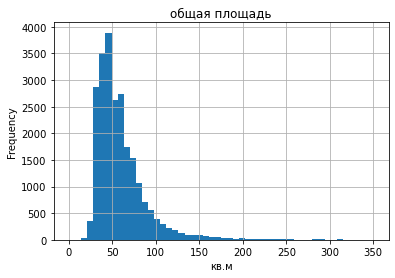

In [91]:
realty_data['total_area'].plot(kind = 'hist',title = 'общая площадь', grid = True, bins = 50, range = (0, 350))
plt.xlabel('кв.м')

Text(0.5, 0, 'рубли')

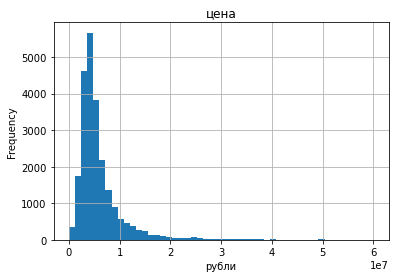

In [92]:
realty_data['last_price'].plot(kind = 'hist',title = 'цена', grid = True, bins = 50, range = (0, 60000000))
plt.xlabel('рубли')

Text(0.5, 0, 'шт.')

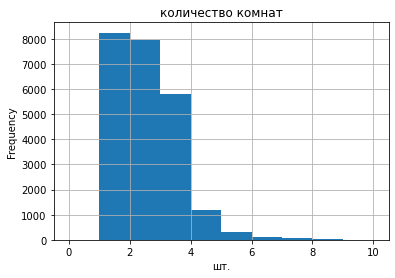

In [93]:
realty_data['rooms'].plot(kind = 'hist',title = 'количество комнат', grid = True, bins = 10, range = (0, 10))
plt.xlabel('шт.')

Text(0.5, 0, 'метры')

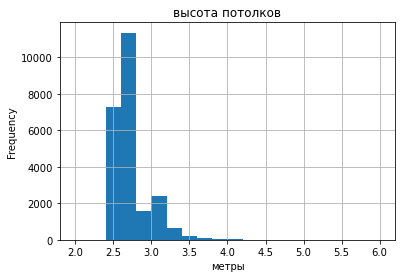

In [94]:
realty_data['ceiling_height'].plot(kind = 'hist',title = 'высота потолков', grid = True, bins = 20, range = (2, 6))
plt.xlabel('метры')

Гистрограммы показывают, что имеющиеся данные, по крайней мере по площади и цене, предположительно подчиняются пуассоновскому закону распределения.  
Далее посмотрим числовое описание данных по этим столбцам и построим диаграммы размаха.

In [95]:
realty_data.loc[:, ['total_area', 'last_price', 'rooms', 'ceiling_height']].describe()

,total_area,last_price,rooms,ceiling_height
count,23668.000000,2.366800e+04,23668.00000,23668.000000
mean,60.330577,6.541423e+06,2.07846,2.708777
std,35.656330,1.089330e+07,1.06634,0.248800
min,12.000000,1.219000e+04,1.00000,2.500000
25%,40.000000,3.400000e+06,1.00000,2.550000
50%,52.000000,4.650000e+06,2.00000,2.650000
75%,69.702500,6.799000e+06,3.00000,2.750000
max,900.000000,7.630000e+08,19.00000,8.300000


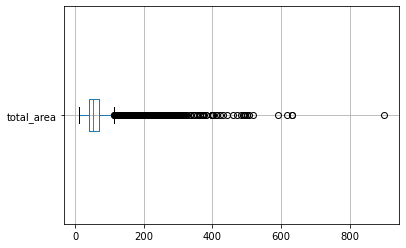

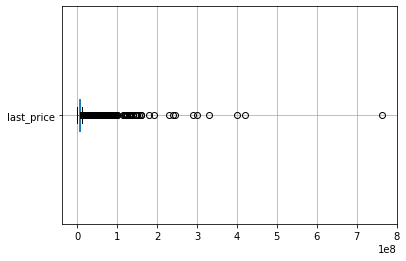

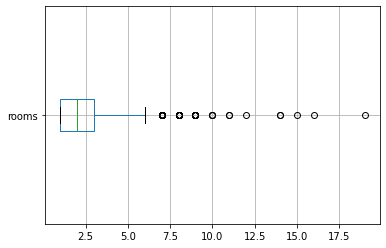

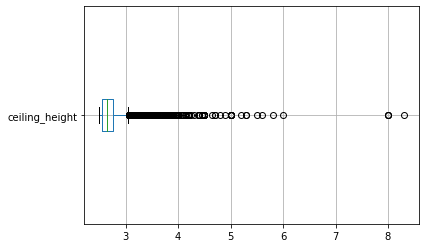

In [96]:
bxpl = realty_data.loc[:, ['total_area', 'last_price', 'rooms', 'ceiling_height']]
for column in bxpl:
    plt.figure()
    bxpl.boxplot([column], vert = False)
    

### Вывод

По результатам оценки гистограмм, числовых данных и диаграмм размаха, получаем представление о структуре данных и имеющихся выбросах.  
Во всех рассматриваемых показателях существуют "выбросы справа".
Далее займемся их исключением

### Изучение времени продажи квартир

Text(0.5, 0, 'дни')

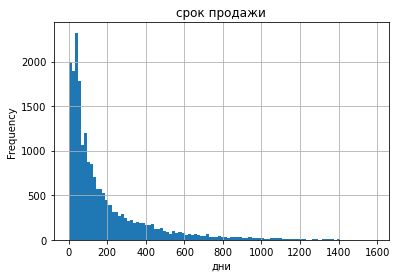

In [97]:
realty_data['days_exposition'].plot(kind = 'hist', title = 'срок продажи', grid = True, bins =100)
plt.xlabel('дни')

In [98]:
realty_data.loc[:, 'days_exposition'].describe()

count    20488.000000
mean       180.878075
std        219.805030
min          1.000000
25%         45.000000
50%         95.000000
75%        232.000000
max       1580.000000
Name: days_exposition, dtype: float64

In [99]:
print('Среднее время продажи квартиры, дней: {: .2f}'.format(realty_data['days_exposition'].mean()))
print('Медианное время продажи квартиры, дней:', realty_data['days_exposition'].median())

Среднее время продажи квартиры, дней:  180.88
Медианное время продажи квартиры, дней: 95.0


Для оценки разброса данных построим диаграмму размаха

Text(0.5, 1.0, 'Диаграмма размаха срока объявления')

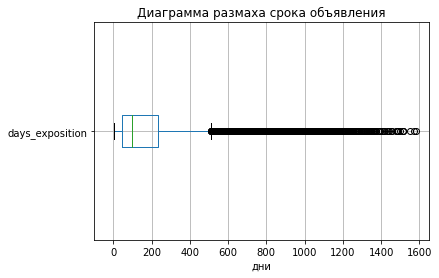

In [100]:
realty_data.boxplot(column = 'days_exposition', vert = False)
plt.xlim(-100, 1650)
plt.xlabel('дни')
plt.title('Диаграмма размаха срока объявления')

### Вывод

Медианное значение времени продажи квартир равно 96 дней. Т.о. сроки менее этого значения можем считать относительно быстрой продажей. Значения до первого квартиля (45 дней), можем считать очень быстрыми продажами. Значения за медианой и третим квартилем (232 дня) будем считать долгим и очень долгим сроком продажи недвижимости. Также присутствует значительнео количество выбросов, от которых избавимся далее.


### Анализ редких и выбивающихся значений

Очистим выбросы по столбцам Общей площади, Цены и Времени продажи, как ключевым параметрам. Все выбросы у нас сосредоточены за правым усом графика.

In [101]:
columns = ['total_area', 'last_price', 'days_exposition']

for i in columns:
    q1 = realty_data[i].quantile(0.25)
    q3 = realty_data[i].quantile(0.75)
    q4 = (q3 - q1)*1.5+q3
    #realty_data[i] = realty_data[realty_data[i] < q4]
    realty_data.drop(realty_data[realty_data[i] > q4].index, inplace=True)

Text(0.5, 0, 'кв.м')

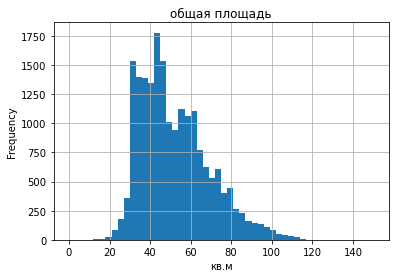

In [102]:
realty_data['total_area'].plot(kind = 'hist',title = 'общая площадь', grid = True, bins = 50, range = (0, 150))
plt.xlabel('кв.м')

На гистрограмме можем видеть некую сегментацию площади квартир, это отчасти можем объяснить типовыми проектами квартир массовой застройки. 
Можно выделить группы в районе 30, 45, 60 кв.м 

Text(0.5, 0, 'руб')

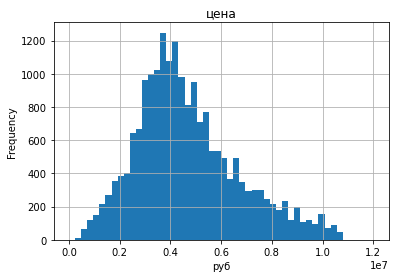

In [103]:
realty_data['last_price'].plot(kind = 'hist',title = 'цена', grid = True, bins = 50, range = (0, 12000000))
plt.xlabel('руб')

Text(0.5, 0, 'кол-во дней')

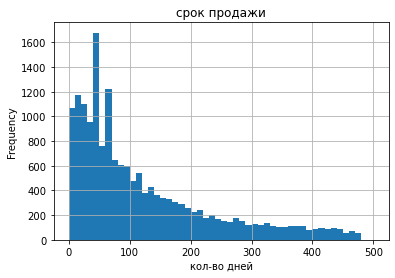

In [104]:
realty_data['days_exposition'].plot(kind = 'hist',title = 'срок продажи', grid = True, bins =50, range = (0, 500))
plt.xlabel('кол-во дней')

In [105]:
realty_data['days_exposition'].value_counts()

45     875
60     530
7      222
30     195
4      162
      ... 
457      3
471      3
452      3
2        3
1        1
Name: days_exposition, Length: 478, dtype: Int64

На гистограмме выделяются  2 пика 45 и 60 дней, что может говорить о некой ошибке в данных, возникшей например в результате "округления" срока продажи квартиры на этапе сбора или предоставления данных. Т.к. эти цифры примерно соответствуют 1,5 и 2 месяцам.   
Аналогично, высокие значения видим и по 7 и 30 дням, что соответствует неделе и месяцу. Это также наталкивает на мысль об "округлениях" срока продажи квартиры при первичном сборе информации.

## Вывод

Были очищены выбросы по  3 показателям:
+ общая площадь;
+ цена;
+ срок продажи

Кроме того, была обнаружена некая сегментация данных.  
По гистограмме общей площади отчетливо видны группы квартир площадью 30 - 45 - 60 -80 метров, как наиболее частая площадь 1, 2, 3 комнатных типовых квартир .  
По гистограмме цены видны пики на "круглых" значениях цены.  
На гистрограмме срока продаж также были обнаружено стремление к указанию округленных сроков продажи квартир, например неделя, месяц, два месяца.

### Исследование факторов влияющих на стоимость квартиры

In [106]:
# Построим матрицы корреляции
display(realty_data.loc[:, ['last_price', 'total_area', 'rooms', 'cityCenters_nearest']].corr())


,last_price,total_area,rooms,cityCenters_nearest
last_price,1.000000,0.675477,0.424228,-0.348595
total_area,0.675477,1.000000,0.803791,-0.108173
rooms,0.424228,0.803791,1.000000,-0.073568
cityCenters_nearest,-0.348595,-0.108173,-0.073568,1.000000


Видим, что между стоимостью-площадью  и стоимостью-количеством комнат у нас положительная корреляция, т.е. при увеличении одного показателя растет и другой.  Аналогично, при увеличении количества комнат , растет стоимость квартиры, т.к. количество комнат находится в сильной корреляционной зависимости от площади.  
Обратная ситуация с стоимостью-расстоянием до центра. При увеличении расстояния от центра , стоимость снижается.  
Наиболее сильная корреляционная связь наблюдается между стоимостью и площадью квартиры, что вполне  ожидаемо.  
Это же подтверждают и диаграммы рассеяния.

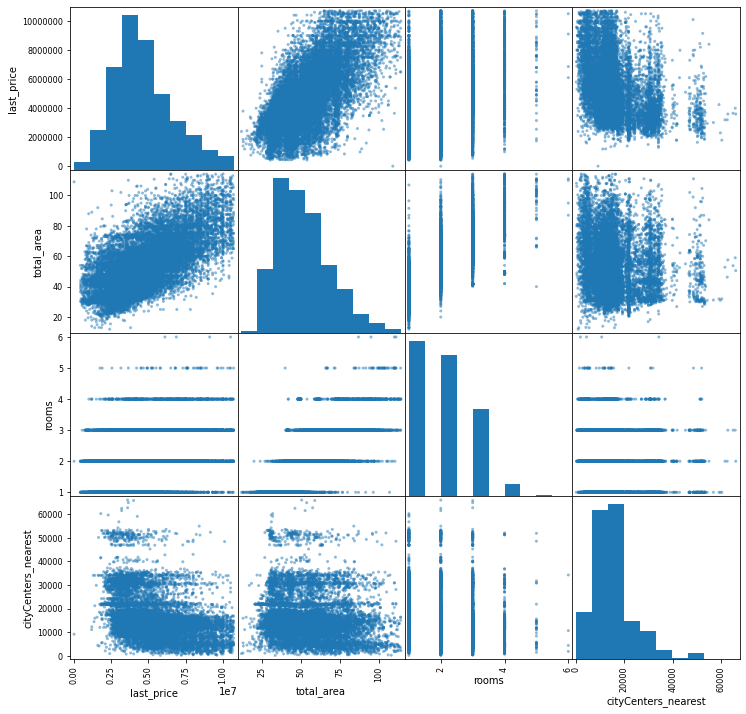

In [107]:
# Построим матрицу диаграмм рассеивания
scatter = pd.plotting.scatter_matrix(realty_data.loc[:, ['last_price', 'total_area', 'rooms', 'cityCenters_nearest']], figsize=(12,12))

Оценим взаимосвязь стоимости квартиры в зависимости от этажа. Оценивать будем по стоимости за квадратный метр, а не по абсолютным ценам недвижимости, т.к. это дает более объективную картину.

In [108]:
floor_price = realty_data.pivot_table(index='rooms', values='meter_price', columns='floor_group')
display(floor_price)

floor_group,другой,первый,последний
rooms,,,
1,102676.396132,86716.231137,90699.115519
2,94362.799890,75278.784935,79501.920793
3,84636.599319,73826.129964,76597.432013
4,80714.652812,73804.804150,77226.827510
5,72318.892371,71147.911686,87133.699634
6,79274.039854,NaN,81981.981982


Видим, что вплоть до четырехкомнатных квартир, помещения на первых этажах имеют самую низкую стоимость квадратного метра.  
Последние этажи чуть дороже, но также дешевле промежуточных.  
Для 5-6 комнатных квартир тенденция меняется и наибольшую цену имеют уже квартиры , расположенные на верхних этажах. Это обусловлено спецификой такого рода недвижимости, которая располагается в премиум сегменте, соответственно приоритеты клиентов меняются и последний этаж рассматривается скорее как преимущество, нежели недостаток.

Оценим графически как изменяется стоимость квадратного метра по каждой из этажностей в зависимости от количества комнат по каждому из этажей

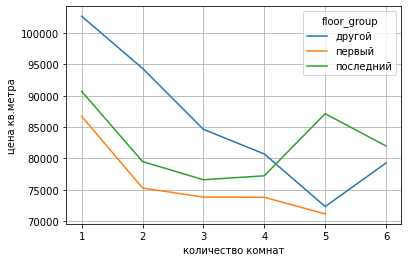

In [109]:
ax = floor_price.plot(xticks=floor_price.index, grid=True)
ylab = ax.set_ylabel('цена кв.метра')
xlab = ax.set_xlabel('количество комнат')

Видим, что цены  на "крайние" этажи более стабильны, а стоимость квадратного метра для промежуточных этажей снижается при увеличении количества комнат.

Оценим взаимосвязь стоимости квадратного метра квартиры и даты размещения объявления:

In [110]:
year_price = realty_data[['first_day_exposition_year', 'meter_price']].groupby('first_day_exposition_year').mean()
display(year_price)

,meter_price
first_day_exposition_year,
2014,111078.291111
2015,86937.500845
2016,88843.631140
2017,89460.094377
2018,91595.747102
2019,98484.986620


Наблюдаем резкое падение средней стоимости недвижимости в 2015 году в связи с изменением макроэкономической ситуации в стране, с дальнейшим плавным ростом в течение 5 лет. 

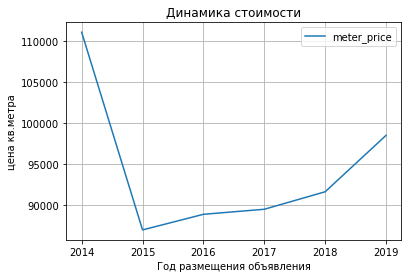

In [111]:
ax = year_price.plot(xticks=year_price.index, grid=True, title='Динамика стоимости')
ylab = ax.set_ylabel('цена кв.метра')
xlab = ax.set_xlabel('Год размещения объявления')

Аналогично оценим изменения стоимости в зависимости от дня недели и месяца.

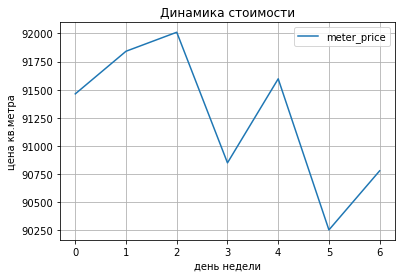

In [112]:
day_price = realty_data[['first_day_exposition_day', 'meter_price']].groupby('first_day_exposition_day').mean()
ax = day_price.plot(xticks=day_price.index, grid=True, title='Динамика стоимости')
ylab = ax.set_ylabel('цена кв.метра')
xlab = ax.set_xlabel('день недели')

В первые три дня недели наблюдается тенденция к росту цены продаж квартир, далее с четверга, видимо в виду уменьшения клиентской активности снижается и средняя цена продаж квартир.

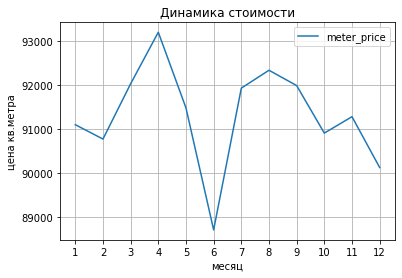

In [113]:
month_price = realty_data[['first_day_exposition_month', 'meter_price']].groupby('first_day_exposition_month').mean()
ax = month_price.plot(xticks=month_price.index, grid=True, title='Динамика стоимости')
ylab = ax.set_ylabel('цена кв.метра')
xlab = ax.set_xlabel('месяц')

Видим, что в начале лета наблюдается снижение средней стоимости продаж квартир, вероятно из-за начала отпускного сезона. Также небольшое снижение в предновогодний период.

## Вывод

Главным фактором влияющим на цену квартиры является ее общая площадь.  
Кроме того, была обнаружена взаимосвязь между динамикой цены и этажом квартиры. Для квартир, находящихся на средних этажах(кроме первого/последнего), присутствует тенденция снижения цены при увеличении количества комнат.  
Для квартир на крайних этажах эта динамика менее заметна, хотя также присутствует.  
Отдельное ценообразование показывают и квартиры с большим количеством комнат (5 и более), для которых расположение на последнем этаже не является негативным фактором вызывающим снижение средней стоимости квадратного метра.  
Также была исследована динамика цены в зависимости от даты размещения объявления. Присутствует восходящая динамика цены за последние 5 лет. Также есть сезонная и внутринедельная зависимость изменения цены.

### Анализ 10 населеных пунктов с наибольшим числом объявлений

In [114]:
max_10_city = realty_data['locality_name'].value_counts().head(10)
display(max_10_city)

Санкт-Петербург      12317
посёлок Мурино         518
посёлок Шушары         412
Всеволожск             360
Колпино                318
Пушкин                 308
посёлок Парголово      308
Гатчина                278
деревня Кудрово        264
Выборг                 212
Name: locality_name, dtype: int64

In [115]:
max_10 = realty_data.query('locality_name in @max_10_city.index')


In [116]:
max_10_group = max_10.groupby('locality_name')['meter_price'].mean()
display(max_10_group)
print('Максимальная цена квадратного метра {: .2f}'.format(max_10_group.max()))
print('Минимальная цена квадратного метра {: .2f}'.format(max_10_group.min()))

locality_name
Всеволожск            66994.056703
Выборг                58217.657245
Гатчина               68874.489890
Колпино               75112.698428
Пушкин               100035.758307
Санкт-Петербург      104981.045847
деревня Кудрово       92550.536788
посёлок Мурино        85916.193546
посёлок Парголово     89913.359335
посёлок Шушары        78612.490273
Name: meter_price, dtype: float64

Максимальная цена квадратного метра  104981.05
Минимальная цена квадратного метра  58217.66


Т.о. максимальная стоимость жилья в Санкт-Петурбурге, минимальная в Выборге

Рассмотрим более подробно эти два города, сравним цены в них на типичные квартиры.

In [117]:
# Количество объектов в продаже для каждого города
realty_data.query('locality_name == "Санкт-Петербург" or locality_name == "Выборг"')['locality_name'].value_counts()


Санкт-Петербург    12317
Выборг               212
Name: locality_name, dtype: int64

In [118]:
# Оценим основную информацию по каждому городу
print('Санкт-Петербург:')
display(realty_data.query('locality_name == "Санкт-Петербург"')[['last_price', 'total_area', 'rooms', 'meter_price']].describe())
print('Выборг:')
display(realty_data.query('locality_name == "Выборг"')[['last_price', 'total_area', 'rooms', 'meter_price']].describe())

Санкт-Петербург:


,last_price,total_area,rooms,meter_price
count,1.231700e+04,12317.000000,12317.000000,12317.000000
mean,5.451856e+06,52.862259,1.930909,104981.045847
std,1.865537e+06,17.439206,0.879755,22402.733057
min,1.219000e+04,12.000000,1.000000,111.834862
25%,4.000000e+06,39.700000,1.000000,89603.960396
50%,5.000000e+06,49.300000,2.000000,101694.915254
75%,6.600000e+06,63.200000,3.000000,116818.181818
max,1.070000e+07,114.200000,6.000000,312240.000000


Выборг:


,last_price,total_area,rooms,meter_price
count,2.120000e+02,212.000000,212.000000,212.000000
mean,3.060590e+06,52.667736,2.056604,58217.657245
std,1.244042e+06,18.414498,0.879791,12020.493717
min,6.000000e+05,22.000000,1.000000,18750.000000
25%,2.237500e+06,38.000000,1.000000,50827.956989
50%,2.775000e+06,48.000000,2.000000,58133.213989
75%,3.700000e+06,65.000000,3.000000,65000.000000
max,8.000000e+06,114.000000,5.000000,94805.194805


Количество объектов в Петербурге на несколько порядков больше чем в Выборге, что вполне предсказуемо.  Распределение площадей квартир в двух городах практически идентично, различия лишь в ценах.
Далее расмотрим ценовое распределение.

In [119]:
# Оценим средние цены для каждого города в разрезе квартир с разным кол-вом комнат
realty_SPb_Vyb = realty_data.query('locality_name == "Санкт-Петербург" or locality_name == "Выборг"').pivot_table(index = 'rooms', columns = 'locality_name', values ='meter_price', aggfunc = 'mean')
realty_SPb_Vyb['%'] = realty_SPb_Vyb['Выборг'] * 100 / realty_SPb_Vyb['Санкт-Петербург']
realty_SPb_Vyb

locality_name,Выборг,Санкт-Петербург,%
rooms,,,
1,62244.638973,114229.241532,54.490985
2,56545.098375,104777.065442,53.967057
3,56991.099118,93103.308474,61.212754
4,55194.258495,86899.674040,63.514920
5,42372.881356,84438.433312,50.181984
6,NaN,83229.719672,NaN


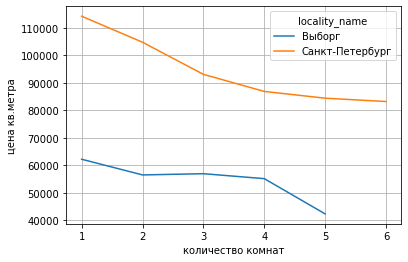

In [133]:
ax = realty_SPb_Vyb[['Выборг', 'Санкт-Петербург']].plot(xticks=realty_SPb_Vyb.index, grid=True)
ylab = ax.set_ylabel('цена кв.метра')
xlab = ax.set_xlabel('количество комнат')

Как видим, разница цены квадратного метра для Санкт-Петурбурга и Выборга практически в  2 раза, вне зависимости от количества комнат, а следственно и площади.

### Анализ изменения цены по степени удаленности от центра

Анализ будем вести по цене квадратного метра а не стоимости квартир, т.к. это нивелирует зависимость от типа жилья в конкретном районе города. 

In [121]:
#Создадим столбец с переведенным в килиметры расстоянием до центра
realty_data['cityCenters_km'] = round(realty_data['cityCenters_nearest'] / 1000)

In [122]:
#Сгруппируем по расстоянию
realty_data_center_group = realty_data.query('locality_name == "Санкт-Петербург"').groupby('cityCenters_km')['meter_price'].mean()
display(realty_data_center_group)

cityCenters_km
0.0     111429.755790
1.0     119732.677035
2.0     115754.855174
3.0     110486.558435
4.0     115360.360962
5.0     119232.238204
6.0     121676.095065
7.0     116003.398067
8.0     113589.155851
9.0     106213.886465
10.0    107156.501161
11.0    104214.550424
12.0    106002.052873
13.0    106102.478406
14.0    103465.961891
15.0    102160.438581
16.0     99090.101393
17.0     95534.703542
18.0     95863.484884
19.0     97840.954518
20.0    103428.021468
21.0     94509.063204
22.0     91279.833388
23.0     92308.042977
24.0     84566.647090
25.0     91531.371618
26.0     89218.435897
27.0     70312.500000
28.0     81161.915320
29.0     66418.254784
Name: meter_price, dtype: float64

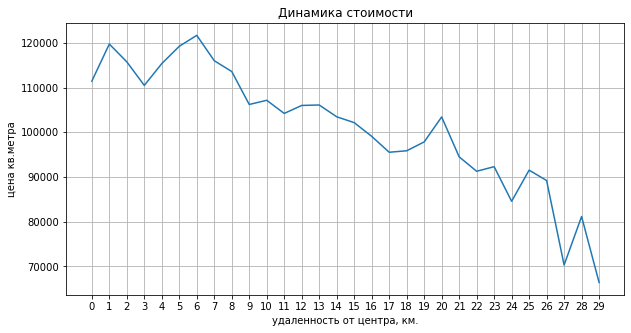

In [123]:
ax = realty_data_center_group.plot(xticks=realty_data_center_group.index, grid=True, title='Динамика стоимости', figsize=(10, 5))
ylab = ax.set_ylabel('цена кв.метра')
xlab = ax.set_xlabel('удаленность от центра, км.')

## Вывод

По графику можем сделать вывод, что центральная часть города ограничена примерно радиусом в 8 километров, выделим квартиры в этой области и проведем дополнительные исследования.

### Сравнение выводов по квартирам в центре и общих выводов по всему городу

Сравним площадь, цену, число комнат и высоту потолков для квартир в центре и городу в целом.

In [124]:
realty_data_center = realty_data.query('cityCenters_km < 8')

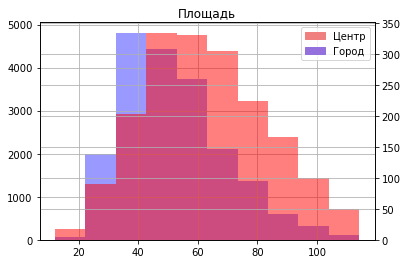

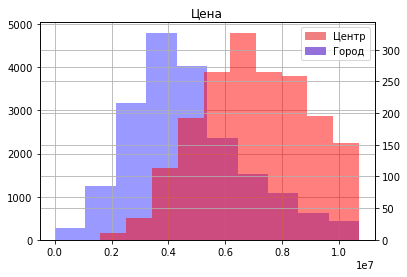

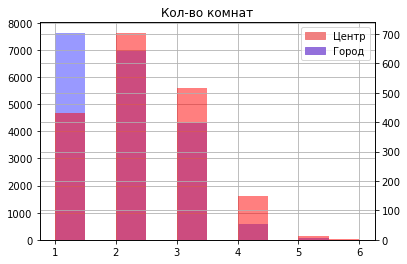

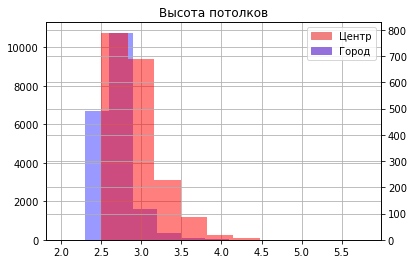

In [125]:
realty_data['total_area'].hist(alpha=0.4, color='blue').twinx()
realty_data_center['total_area'].hist(alpha=0.5,label='Центр', color='red')
plt.title('Площадь')
red_patch = mpatches.Patch(color='lightcoral', label='Центр')
blue_patch = mpatches.Patch(color='mediumpurple', label='Город')
plt.legend(handles=[red_patch, blue_patch])
plt.show()


realty_data['last_price'].hist(alpha=0.4, color='blue').twinx()
realty_data_center['last_price'].hist(alpha=0.5, color='red', label='Центр')
plt.title('Цена')
plt.legend()
red_patch = mpatches.Patch(color='lightcoral', label='Центр')
blue_patch = mpatches.Patch(color='mediumpurple', label='Город')
plt.legend(handles=[red_patch, blue_patch])
plt.show()


realty_data['rooms'].hist(alpha=0.4, color='blue').twinx()
realty_data_center['rooms'].hist(alpha=0.5, color='red', label='Центр' )
plt.title('Кол-во комнат')
plt.legend()
red_patch = mpatches.Patch(color='lightcoral', label='Центр')
blue_patch = mpatches.Patch(color='mediumpurple', label='Город')
plt.legend(handles=[red_patch, blue_patch])
plt.show()


realty_data['ceiling_height'].hist(alpha=0.4, color='blue', range=(2,5)).twinx()
realty_data_center['ceiling_height'].hist(alpha=0.5, color='red', label='Центр' )
plt.title('Высота потолков')
plt.legend()
red_patch = mpatches.Patch(color='lightcoral', label='Центр')
blue_patch = mpatches.Patch(color='mediumpurple', label='Город')
plt.legend(handles=[red_patch, blue_patch])
plt.show()



Можем сделать вывод, что квартиры в центре имеют большую среднюю площадь и соответственно цену, чем в целом по городу.  
В центральном районе больше количество многокомнатных квартир, превышает количество однокомнатных, в то время как на периферии, наиболее популярны одно- двухкомнатные квартиры.  
Высота потолков в квартирах в центре также немного выше аналогичного показателя среднего городского жилья.

Проведем исследования по влиянию числа комнат, этажа, удаленности от центра, даты размещения объявления на стоимость квартиры, для центрального района.  
Сравним с аналогичной информацией для всего города.

In [126]:
display(realty_data_center.loc[:, ['last_price', 'total_area', 'rooms', 'cityCenters_nearest']].corr())

,last_price,total_area,rooms,cityCenters_nearest
last_price,1.000000,0.695837,0.461607,-0.157244
total_area,0.695837,1.000000,0.798863,-0.185105
rooms,0.461607,0.798863,1.000000,-0.162578
cityCenters_nearest,-0.157244,-0.185105,-0.162578,1.000000


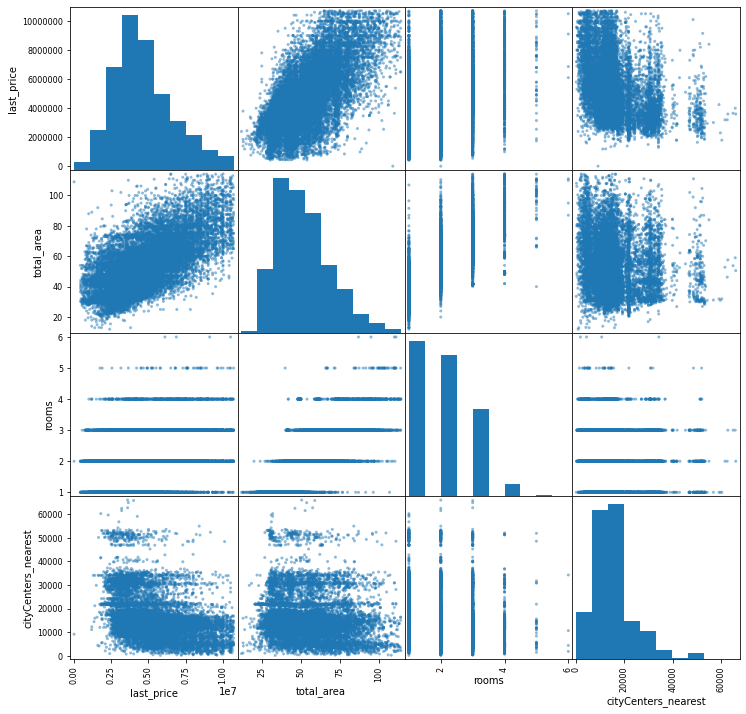

In [127]:
scatter_center = pd.plotting.scatter_matrix(realty_data.loc[:, ['last_price', 'total_area', 'rooms', 'cityCenters_nearest']], figsize=(12,12))

Имеем зависимости, аналогичные городу в целом. Единственное, что зависимость цены от близости к центру для центральных квартир немного меньше.

Оценим влияние этажности на цену квадратного метра квартир в центре

In [128]:
floor_price_center = realty_data_center.pivot_table(index='rooms', values='meter_price', columns='floor_group')
display(floor_price)

floor_group,другой,первый,последний
rooms,,,
1,102676.396132,86716.231137,90699.115519
2,94362.799890,75278.784935,79501.920793
3,84636.599319,73826.129964,76597.432013
4,80714.652812,73804.804150,77226.827510
5,72318.892371,71147.911686,87133.699634
6,79274.039854,NaN,81981.981982


Аналогично городским квартирам, для квартир в центре, помещения на первых этажах имеют самую низкую стоимость квадратного метра.  
Последние этажи чуть дороже, но также дешевле промежуточных.  
Для 5-6 комнатных квартир тенденция меняется и наибольшую цену имеют уже квартиры , расположенные на верхних этажах. Это обусловлено спецификой такого рода недвижимости, которая располагается в премиум сегменте, соответственно приоритеты клиентов меняются и последний этаж рассматривается скорее как преимущество, нежели недостаток.

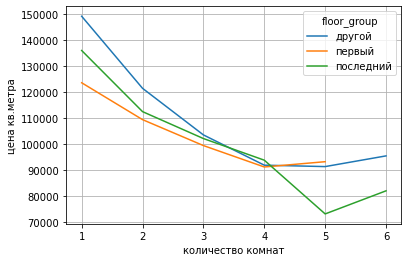

In [129]:
ax = floor_price_center.plot(xticks=floor_price_center.index, grid=True)
ylab = ax.set_ylabel('цена кв.метра')
xlab = ax.set_xlabel('количество комнат')

В отличии от городских квартир, квартиры в центре имеют явную тенденцию к уменьшению цены квадратного метра пр увеличении количества комнат и соответственно площади.  
Причем снижение цены не зависит от этажности квартиры.

Оценим взаимосвязь стоимости квадратного метра квартиры и даты размещения объявления:

In [130]:
year_price_center = realty_data_center[['first_day_exposition_year', 'meter_price']].groupby('first_day_exposition_year').mean()
display(year_price_center)

,meter_price
first_day_exposition_year,
2015,104236.456679
2016,111865.874678
2017,114643.883625
2018,119539.300943
2019,126706.081698


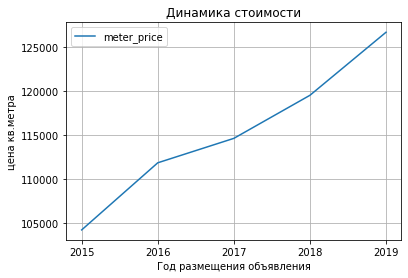

In [131]:
ax = year_price_center.plot(xticks=year_price_center.index, grid=True, title='Динамика стоимости')
ylab = ax.set_ylabel('цена кв.метра')
xlab = ax.set_xlabel('Год размещения объявления')

Квартиры в центре показывают также восходящий тренд изменения цены квартир, но динамика этого роста почти в 2 раза превышает динамику цен на периферии.

## Вывод

Сравнение взаимосвязей показателей по квартирам в центре и городу в целом показывают что есть как общие факторы, так и различия. 
Наибольшее влияние на цену квартиры оказывает площадь и количество комнат, при любой локации.  
Квартиры в центер отличаются как большей средней площадью так и большим предложением многокомнатных квартир, в то время как для города в целом самыми популярными являются 1-2 комнатные.  
Также есть отличия по ценообразованию в зависимости от этажа (для квартир в центре это показатель сильнее влияющий на цену) и даты размещения. Для квартир в центре восстановление цен после падения 2015 года происходит более быстрыми темпами, чем для города в целом.  


## Шаг 5. Общий вывод

Проведена работа  по исследованию данных сервиса Яндекс.Недвижимость - архиву объявлений по Санкт-Петурбургу и области.  
Произведена предобработка предоставленных данных, заменены пропуски, приведены в соответствие типы данных хранящейся в столбцах информации.
На этапе исследовательского анализа данных были изучены основные парамеры объектов недвижимости, оценены их взаимосвязи и степень влияния на конечную цену продажи квартиры. Было установлено, что факторами, оказывающими наибольшее влияние на цену, являются площадь и количество комнат, этаж на котором расположена квартира, а также ее месторасположение.  
Квартиры, находящиеся в центральной часси города, показывают большую среднюю площадь, количество комнат и соответственно цену.   
Оценена динамика стоимости квадратного метра в зависимости от этажа нахождения квартиры, которая имеет отличия от квартир в центер и для города в целом.  

Также была оценена динамика роста цен на недвижимость в зависимости от района города, которая также имеет свои особенности в зависимости от района. И в целом, квартиры расположенные в центральных областях города показывают опережающую динамику по всем показателям.

    Т.к. целью нашего исследования было подготовка рекомендаций для создания автоматизированной системы, которая позволит выявлять аномалии, как для борьбы со злоупотреблениями, так и для повышения выручки, то сформируем их по нескольким позициям:  
    1. Необходимо ввести несколько автоматических проверок в системе ввода данных:
    + Проверка отсутствия пустых значений;
    + Проверка логичности данных:
        + Сумма жилой площади и площади кухни не может быть больше площади квартиры
        + Этажность квартиры не может быть больше этажности дома
        + Необходимо экспертно ограничить значения высоты полотка, например диапазоном от  2 до 25 метров. 
        + Создать справочники категориальных данных, для выбора их пользователями на этапе ввода данных в систему. В частности для исключения дублирования одних и тех же населенных пунктов с разным написанием.
    2. На основании проведенного анализа, взяв за основу, например, медианные цены для объектов с аналогичными характеристиками (площадь, район, кол-во комнат и т.п.) рекомендуется ввести корридор доступных для ввода цен на объекты недвижимости в разрезе локаций. Это позволит исключить случаи с заведомо некорректно выставленной (заниженной в разы) ценой, что может использоваться в т.ч и для целей недобросовестной конкуренции.
    3. Необходимо разработать концепцию работы с "вечно продающимися объектами", срок продаж которых исчисляется годами. Кроме реальных, непродаваемых объектов, также могут быть фиктивные объекты, используемые для целей недобросовестной конкуренции.
    Полученные в результате анализа данные можно использовать в т.ч. и для оценки рыночной стоимости объекта недвижимости по методу сравнительного анализа продаж. Использование полученных выводов позволит если не полностью исключить этап поиска объектов - аналогов, то функционально существенно дополнить инструментарий  специалиста для проведения этого этапа исследования, тем самым повысив его производительность труда и итоговый финансовый результат.  
    